In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
%matplotlib inline

In [2]:
data = pd.read_csv("bank.csv", sep=';')

# Data Pre-Processing

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
#Observe that there are some columns that only have two distinct values. 
#So we just need to label encode them and not One hot encode them otherwise unnecessarily attributes will be added
len(data['default'].unique())

2

In [5]:
#label encode all the attributes with object data types including the final y column

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder = LabelEncoder()
data.iloc[:, 16] = labelencoder.fit_transform(data.iloc[:, 16])

labelencoder = LabelEncoder()
data.iloc[:, 1] = labelencoder.fit_transform(data.iloc[:, 1])

labelencoder = LabelEncoder()
data.iloc[:, 2] = labelencoder.fit_transform(data.iloc[:, 2])

labelencoder = LabelEncoder()
data.iloc[:, 3] = labelencoder.fit_transform(data.iloc[:, 3])

labelencoder = LabelEncoder()
data.iloc[:, 4] = labelencoder.fit_transform(data.iloc[:, 4])

labelencoder = LabelEncoder()
data.iloc[:, 6] = labelencoder.fit_transform(data.iloc[:, 6])

labelencoder = LabelEncoder()
data.iloc[:, 7] = labelencoder.fit_transform(data.iloc[:, 7])

labelencoder = LabelEncoder()
data.iloc[:, 8] = labelencoder.fit_transform(data.iloc[:, 8])

labelencoder = LabelEncoder()
data.iloc[:, 10] = labelencoder.fit_transform(data.iloc[:, 10])

labelencoder = LabelEncoder()
data.iloc[:, 15] = labelencoder.fit_transform(data.iloc[:, 15])

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [6]:
#flag = 1 indicates that that attribute needs to be converted further into One hot encoded form
#All len variables are used to keep measure of how many new attributes are being added

flag1 = 1
flag2 = 1
flag3 = 1
flag4 = 1
flag6 = 1
flag7 = 1
flag8 = 1
flag10 = 1
flag15 = 1

len1 = len(data['job'].unique())
len2 = len(data['marital'].unique())
len3 = len(data['education'].unique())
len4 = len(data['default'].unique())
len6 = len(data['housing'].unique())
len7 = len(data['loan'].unique())
len8 = len(data['contact'].unique())
len10 = len(data['month'].unique())
len15 = len(data['poutcome'].unique())

if len1<=2:
    flag1 = 0
    len1 = 1

if len2<=2:
    flag2 = 0
    len2 = 1

if len3<=2:
    flag3 = 0
    len3 = 1

if len4<=2:
    flag4 = 0
    len4 = 1

if len6<=2:
    flag6 = 0
    len6 = 1

if len7<=2:
    flag7 = 0
    len7 = 1

if len8<=2:
    flag8 = 0
    len8 = 1

if len10<=2:
    flag10 = 0
    len10 = 1

if len15<=2:
    flag15 = 0
    len15 = 1

In [7]:
if flag1 == 1:
    onehotencoder = OneHotEncoder(categorical_features = [1])
    data = onehotencoder.fit_transform(data).toarray()

data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,10.0,79.0,1.0,-1.0,0.0,3.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,11.0,8.0,220.0,1.0,339.0,4.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,185.0,1.0,330.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,6.0,199.0,4.0,-1.0,0.0,3.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,5.0,8.0,226.0,1.0,-1.0,0.0,3.0,0.0


In [8]:
if flag2 == 1:
    onehotencoder = OneHotEncoder(categorical_features = [2+(len1-1)])
    data = onehotencoder.fit_transform(data).toarray()

data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,10.0,79.0,1.0,-1.0,0.0,3.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,11.0,8.0,220.0,1.0,339.0,4.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,16.0,0.0,185.0,1.0,330.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,3.0,6.0,199.0,4.0,-1.0,0.0,3.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,5.0,8.0,226.0,1.0,-1.0,0.0,3.0,0.0


In [9]:
if flag3 == 1:
    onehotencoder = OneHotEncoder(categorical_features = [3+(len1-1)+(len2-1)])
    data = onehotencoder.fit_transform(data).toarray()

data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,10.0,79.0,1.0,-1.0,0.0,3.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,11.0,8.0,220.0,1.0,339.0,4.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,185.0,1.0,330.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,6.0,199.0,4.0,-1.0,0.0,3.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,2.0,5.0,8.0,226.0,1.0,-1.0,0.0,3.0,0.0


In [10]:
if flag4 == 1:
    onehotencoder = OneHotEncoder(categorical_features = [4+(len1-1)+(len2-1)+(len3-1)])
    data = onehotencoder.fit_transform(data).toarray()

data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,10.0,79.0,1.0,-1.0,0.0,3.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,11.0,8.0,220.0,1.0,339.0,4.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,185.0,1.0,330.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,6.0,199.0,4.0,-1.0,0.0,3.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,2.0,5.0,8.0,226.0,1.0,-1.0,0.0,3.0,0.0


In [11]:
if flag6 == 1:
    onehotencoder = OneHotEncoder(categorical_features = [6+(len1-1)+(len2-1)+(len3-1)+(len4-1)])
    data = onehotencoder.fit_transform(data).toarray()

data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,10.0,79.0,1.0,-1.0,0.0,3.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,11.0,8.0,220.0,1.0,339.0,4.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,185.0,1.0,330.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,6.0,199.0,4.0,-1.0,0.0,3.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,2.0,5.0,8.0,226.0,1.0,-1.0,0.0,3.0,0.0


In [12]:
if flag7 == 1:
    onehotencoder = OneHotEncoder(categorical_features = [7+(len1-1)+(len2-1)+(len3-1)+(len4-1)+(len6-1)])
    data = onehotencoder.fit_transform(data).toarray()

data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,10.0,79.0,1.0,-1.0,0.0,3.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,11.0,8.0,220.0,1.0,339.0,4.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,16.0,0.0,185.0,1.0,330.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,6.0,199.0,4.0,-1.0,0.0,3.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,2.0,5.0,8.0,226.0,1.0,-1.0,0.0,3.0,0.0


In [13]:
if flag8 == 1:
    onehotencoder = OneHotEncoder(categorical_features = [8+(len1-1)+(len2-1)+(len3-1)+(len4-1)+(len6-1)+(len7-1)])
    data = onehotencoder.fit_transform(data).toarray()

data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,19.0,10.0,79.0,1.0,-1.0,0.0,3.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,11.0,8.0,220.0,1.0,339.0,4.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,16.0,0.0,185.0,1.0,330.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,3.0,6.0,199.0,4.0,-1.0,0.0,3.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,5.0,8.0,226.0,1.0,-1.0,0.0,3.0,0.0


In [14]:
if flag10 == 1:
    onehotencoder = OneHotEncoder(categorical_features = [10+(len1-1)+(len2-1)+(len3-1)+(len4-1)+(len6-1)+(len7-1)+(len8-1)])
    data = onehotencoder.fit_transform(data).toarray()

data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1787.0,0.0,0.0,19.0,79.0,1.0,-1.0,0.0,3.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4789.0,1.0,1.0,11.0,220.0,1.0,339.0,4.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1350.0,1.0,0.0,16.0,185.0,1.0,330.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1476.0,1.0,1.0,3.0,199.0,4.0,-1.0,0.0,3.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,5.0,226.0,1.0,-1.0,0.0,3.0,0.0


In [15]:
if flag15 == 1:
    onehotencoder = OneHotEncoder(categorical_features = [15+(len1-1)+(len2-1)+(len3-1)+(len4-1)+(len6-1)+(len7-1)+(len8-1)+(len10-1)])
    data = onehotencoder.fit_transform(data).toarray()

data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1787.0,0.0,0.0,19.0,79.0,1.0,-1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4789.0,1.0,1.0,11.0,220.0,1.0,339.0,4.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1350.0,1.0,0.0,16.0,185.0,1.0,330.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1476.0,1.0,1.0,3.0,199.0,4.0,-1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,5.0,226.0,1.0,-1.0,0.0,0.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 49 columns):
0     4521 non-null float64
1     4521 non-null float64
2     4521 non-null float64
3     4521 non-null float64
4     4521 non-null float64
5     4521 non-null float64
6     4521 non-null float64
7     4521 non-null float64
8     4521 non-null float64
9     4521 non-null float64
10    4521 non-null float64
11    4521 non-null float64
12    4521 non-null float64
13    4521 non-null float64
14    4521 non-null float64
15    4521 non-null float64
16    4521 non-null float64
17    4521 non-null float64
18    4521 non-null float64
19    4521 non-null float64
20    4521 non-null float64
21    4521 non-null float64
22    4521 non-null float64
23    4521 non-null float64
24    4521 non-null float64
25    4521 non-null float64
26    4521 non-null float64
27    4521 non-null float64
28    4521 non-null float64
29    4521 non-null float64
30    4521 non-null float64
31    4521 non-null float

In [17]:
data.isnull().values.any()

False

In [18]:
data.duplicated().sum()

0

In [19]:
#Data has been Preprocessed. Now divide into x and y
ycol = 16+(len1-1)+(len2-1)+(len3-1)+(len4-1)+(len6-1)+(len7-1)+(len8-1)+(len10-1)+(len15-1)
ycol

48

In [20]:
y = data[ycol]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 48, dtype: float64

In [21]:
X = data.drop([ycol], axis = 1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,0.0,1787.0,0.0,0.0,19.0,79.0,1.0,-1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,0.0,4789.0,1.0,1.0,11.0,220.0,1.0,339.0,4.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35.0,0.0,1350.0,1.0,0.0,16.0,185.0,1.0,330.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,0.0,1476.0,1.0,1.0,3.0,199.0,4.0,-1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.0,0.0,0.0,1.0,0.0,5.0,226.0,1.0,-1.0,0.0


In [22]:
#Performing Min_Max Normalization on X data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_Norm = pd.DataFrame(np_scaled)
X_Norm.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.161765,0.0,0.068455,0.0,0.0,0.600000,0.024826,0.000000,0.000000,0.00
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.205882,0.0,0.108750,1.0,1.0,0.333333,0.071500,0.000000,0.389908,0.16
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.235294,0.0,0.062590,1.0,0.0,0.500000,0.059914,0.000000,0.379587,0.04
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.161765,0.0,0.064281,1.0,1.0,0.066667,0.064548,0.061224,0.000000,0.00
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.588235,0.0,0.044469,1.0,0.0,0.133333,0.073486,0.000000,0.000000,0.00


In [23]:
#Splitting Non - Normalized Data. Since the dataset is small, we'll split it into 80-20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [24]:
#Splitting Normalized Data. Since the dataset is small, we'll split it into 80-20 ratio
from sklearn.model_selection import train_test_split
X_train_Norm, X_test_Norm, y_train_Norm, y_test_Norm = train_test_split(X_Norm, y, test_size=0.20, random_state=101)

# Decision Tree

In [25]:
#Normalized Data
from sklearn.tree import DecisionTreeClassifier
error_rate_train = []
for i in range(1,20):
    
    dTree = DecisionTreeClassifier(max_depth=i)
    dTree.fit(X_train_Norm,y_train_Norm)
    pred_i_dt = dTree.predict(X_train_Norm)
    error_rate_train.append(np.mean(pred_i_dt != y_train_Norm))
    
error_rate_test = []
for i in range(1,20):
    
    dTree = DecisionTreeClassifier(max_depth=i)
    dTree.fit(X_train_Norm,y_train_Norm)
    pred_i_dt = dTree.predict(X_test_Norm)
    error_rate_test.append(np.mean(pred_i_dt != y_test_Norm))

Text(0,0.5,'Error Rate')

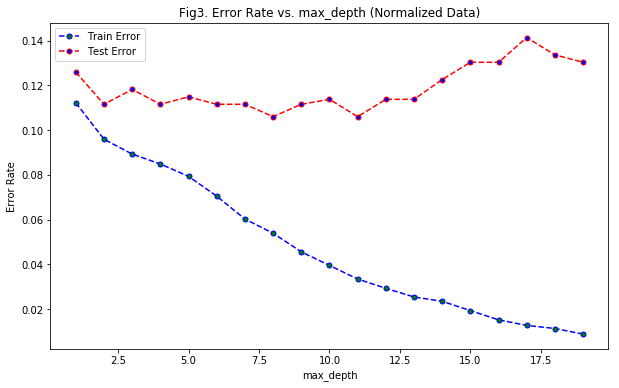

In [26]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(1,20),error_rate_train,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(1,20),error_rate_test,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Error","Test Error"])
plt.title('Fig3. Error Rate vs. max_depth (Normalized Data)')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')

In [27]:
#Non-Normalized Data
error_rate_train = []
for i in range(1,20):
    
    dTree = DecisionTreeClassifier(max_depth=i)
    dTree.fit(X_train,y_train)
    pred_i_dt = dTree.predict(X_train)
    error_rate_train.append(np.mean(pred_i_dt != y_train))
    
error_rate_test = []
for i in range(1,20):
    
    dTree = DecisionTreeClassifier(max_depth=i)
    dTree.fit(X_train,y_train)
    pred_i_dt = dTree.predict(X_test)
    error_rate_test.append(np.mean(pred_i_dt != y_test))

Text(0,0.5,'Error Rate')

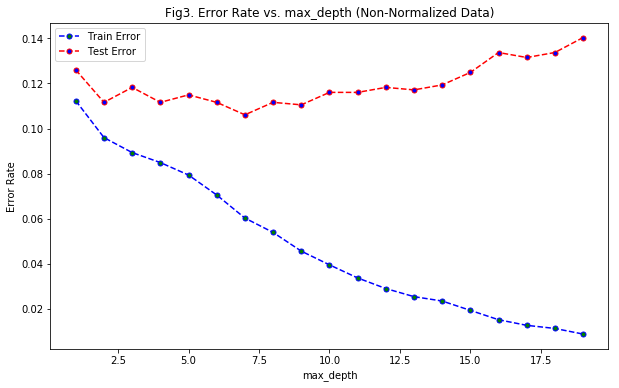

In [28]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(1,20),error_rate_train,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(1,20),error_rate_test,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Error","Test Error"])
plt.title('Fig3. Error Rate vs. max_depth (Non-Normalized Data)')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')

In [29]:
dTreeN = DecisionTreeClassifier(max_depth=8) 
dTree = DecisionTreeClassifier(max_depth=7) 

In [30]:
dTree.fit(X_train,y_train)
print("Accuracy without Normalization = ",dTree.score(X_test,y_test))

Accuracy without Normalization =  0.8906077348066298


In [31]:
y_pred_DT = dTree.predict(X_test)
print(confusion_matrix(y_test, y_pred_DT))

[[769  31]
 [ 68  37]]


In [32]:
dTreeN.fit(X_train_Norm,y_train_Norm)
print("Accuracy with Normalization = ",dTreeN.score(X_test_Norm,y_test_Norm))

Accuracy with Normalization =  0.8917127071823204


In [37]:
y_pred_DT = dTreeN.predict(X_test_Norm)
print(confusion_matrix(y_test_Norm, y_pred_DT))

[[767  33]
 [ 65  40]]


In [38]:
print(classification_report(y_test_Norm, y_pred_DT))

             precision    recall  f1-score   support

        0.0       0.92      0.96      0.94       800
        1.0       0.55      0.38      0.45       105

avg / total       0.88      0.89      0.88       905



In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

print(roc_auc_score(y_test_Norm, dTreeN.predict_proba(X_test_Norm)[:,1]))

0.7343630952380954


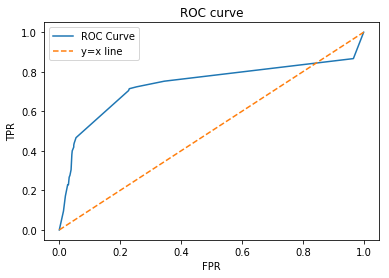

In [40]:
#AUC Curve

fpr, tpr, _ = roc_curve(y_test_Norm, dTreeN.predict_proba(X_test_Norm)[:,1])
plt.clf()
ROC_Curve, = plt.plot(fpr, tpr)
x = np.linspace(0, 1, 100)
equal_line, = plt.plot(x,x,linestyle='dashed')
plt.legend( [ROC_Curve,equal_line],["ROC Curve","y=x line"])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [41]:
#Cross Validation
from sklearn.model_selection import cross_validate
cv_results = cross_validate(dTreeN, X_Norm, y, cv=3,scoring=('accuracy','f1','recall','precision'), return_train_score=True)
print(cv_results.keys())
print("Train Accuracy for 3 folds= ",cv_results['train_accuracy'],"\nTest Accuracy for 3 folds = ",cv_results['test_accuracy'])
print("Train F1 Score for 3 folds = ",cv_results['train_f1'],"\nTest F1 Score  for 3 folds = ",cv_results['test_f1'])
print("Train Recall for 3 folds = ",cv_results['train_recall'],"\nTest Recall  for 3 folds = ",cv_results['test_recall'])
print("Train Precision for 3 folds = ",cv_results['train_precision'],"\nTest Precision for 3 folds = ",cv_results['test_precision'])

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1', 'train_f1', 'test_recall', 'train_recall', 'test_precision', 'train_precision'])
Train Accuracy for 3 folds=  [0.94922005 0.95089582 0.94361526] 
Test Accuracy for 3 folds =  [0.88328912 0.8871931  0.90106242]
Train F1 Score for 3 folds =  [0.73015873 0.74305556 0.72402597] 
Test F1 Score  for 3 folds =  [0.36231884 0.40559441 0.49146758]
Train Recall for 3 folds =  [0.59654179 0.6167147  0.6408046 ] 
Test Recall  for 3 folds =  [0.28735632 0.33333333 0.41618497]
Train Precision for 3 folds =  [0.94090909 0.93449782 0.83208955] 
Test Precision for 3 folds =  [0.49019608 0.51785714 0.6       ]


# Random Forest

In [42]:
#Normalized Data
from sklearn.ensemble import RandomForestClassifier

score_train_RF = []
score_test_RF = []

for i in range(1,20,1):
    rf = RandomForestClassifier(n_estimators=i,criterion='entropy')
    rf.fit(X_train_Norm, y_train_Norm)
    sc_train = rf.score(X_train_Norm,y_train_Norm)
    score_train_RF.append(sc_train)
    
for i in range(1,20,1):
    rf = RandomForestClassifier(n_estimators=i,criterion='entropy')
    rf.fit(X_train_Norm, y_train_Norm)
    sc_test = rf.score(X_test_Norm,y_test_Norm)
    score_test_RF.append(sc_test)

Text(0,0.5,'Score')

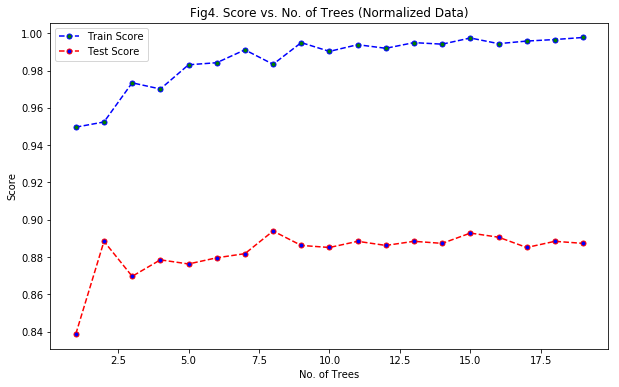

In [43]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(1,20,1),score_train_RF,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(1,20,1),score_test_RF,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Score","Test Score"])
plt.title('Fig4. Score vs. No. of Trees (Normalized Data)')
plt.xlabel('No. of Trees')
plt.ylabel('Score')

In [44]:
#Non-Normalized Data
score_train_RF = []
score_test_RF = []

for i in range(1,20,1):
    rf = RandomForestClassifier(n_estimators=i,criterion='entropy')
    rf.fit(X_train, y_train)
    sc_train = rf.score(X_train,y_train)
    score_train_RF.append(sc_train)
    
for i in range(1,20,1):
    rf = RandomForestClassifier(n_estimators=i,criterion='entropy')
    rf.fit(X_train, y_train)
    sc_test = rf.score(X_test,y_test)
    score_test_RF.append(sc_test)

Text(0,0.5,'Score')

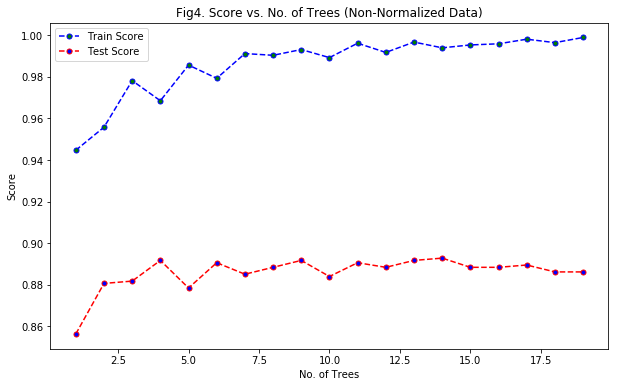

In [45]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(1,20,1),score_train_RF,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(1,20,1),score_test_RF,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Score","Test Score"])
plt.title('Fig4. Score vs. No. of Trees (Non-Normalized Data)')
plt.xlabel('No. of Trees')
plt.ylabel('Score')

In [52]:
rfN = RandomForestClassifier(n_estimators=8,criterion='entropy')
rfN.fit(X_train_Norm, y_train_Norm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
print("Accuracy with Normalization = ",rfN.score(X_test_Norm,y_test_Norm))

Accuracy with Normalization =  0.8795580110497238


In [54]:
y_pred_RF = rfN.predict(X_test_Norm)
confusion_matrix(y_test_Norm, y_pred_RF)

array([[774,  26],
       [ 83,  22]])

In [55]:
rf = RandomForestClassifier(n_estimators=4,criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
print("Accuracy without Normalization = ",rf.score(X_test,y_test))

Accuracy without Normalization =  0.8839779005524862


In [57]:
y_pred_RF = rf.predict(X_test)
confusion_matrix(y_test, y_pred_RF)

array([[776,  24],
       [ 81,  24]])

In [58]:
print(classification_report(y_test, y_pred_RF))

             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94       800
        1.0       0.50      0.23      0.31       105

avg / total       0.86      0.88      0.86       905



In [59]:
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

0.7392321428571429


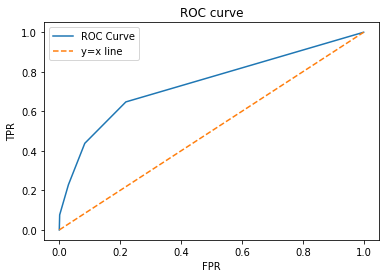

In [61]:
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.clf()
ROC_Curve, = plt.plot(fpr, tpr)
x = np.linspace(0, 1, 100)
equal_line, = plt.plot(x,x,linestyle='dashed')
plt.legend( [ROC_Curve,equal_line],["ROC Curve","y=x line"])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [62]:
#Cross Validation

cv_results = cross_validate(rf, X, y, cv=3,scoring=('accuracy','f1','recall','precision'), return_train_score=True)
print(cv_results.keys())
print("Train Accuracy for 3 folds= ",cv_results['train_accuracy'],"\nTest Accuracy for 3 folds = ",cv_results['test_accuracy'])
print("Train F1 Score for 3 folds = ",cv_results['train_f1'],"\nTest F1 Score  for 3 folds = ",cv_results['test_f1'])
print("Train Recall for 3 folds = ",cv_results['train_recall'],"\nTest Recall  for 3 folds = ",cv_results['test_recall'])
print("Train Precision for 3 folds = ",cv_results['train_precision'],"\nTest Precision for 3 folds = ",cv_results['test_precision'])

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1', 'train_f1', 'test_recall', 'train_recall', 'test_precision', 'train_precision'])
Train Accuracy for 3 folds=  [0.96880186 0.97213006 0.97280265] 
Test Accuracy for 3 folds =  [0.88129973 0.87591241 0.88977424]
Train F1 Score for 3 folds =  [0.84385382 0.86407767 0.86731392] 
Test F1 Score  for 3 folds =  [0.26337449 0.17621145 0.26548673]
Train Recall for 3 folds =  [0.73198847 0.76945245 0.77011494] 
Test Recall  for 3 folds =  [0.18390805 0.11494253 0.1734104 ]
Train Precision for 3 folds =  [0.99607843 0.98523985 0.99259259] 
Test Precision for 3 folds =  [0.46376812 0.37735849 0.56603774]


# Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB as NB
nb = NB()
nbN = NB()

In [93]:
nbN.fit(X_train_Norm,y_train_Norm)

GaussianNB(priors=None)

In [94]:
print("Accuracy with Normalization = ",nbN.score(X_test_Norm,y_test_Norm))

Accuracy with Normalization =  0.8320441988950277


In [95]:
y_pred_NB_Norm = nbN.predict(X_test_Norm)
print(confusion_matrix(y_test_Norm, y_pred_NB_Norm))

[[704  96]
 [ 56  49]]


In [96]:
nb.fit(X_train,y_train)

GaussianNB(priors=None)

In [97]:
print("Accuracy without Normalization = ",nb.score(X_test,y_test))

Accuracy without Normalization =  0.8287292817679558


In [98]:
y_pred_NB = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred_NB))

[[698 102]
 [ 53  52]]


In [99]:
print(classification_report(y_test_Norm, y_pred_NB_Norm))

             precision    recall  f1-score   support

        0.0       0.93      0.88      0.90       800
        1.0       0.34      0.47      0.39       105

avg / total       0.86      0.83      0.84       905



In [100]:
print(roc_auc_score(y_test_Norm, nbN.predict_proba(X_test_Norm)[:,1]))

0.8177142857142857


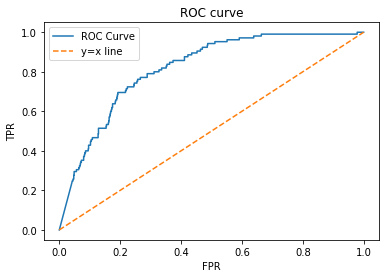

In [101]:
fpr, tpr, _ = roc_curve(y_test_Norm, nbN.predict_proba(X_test_Norm)[:,1])
plt.clf()
ROC_Curve, = plt.plot(fpr, tpr)
x = np.linspace(0, 1, 100)
equal_line, = plt.plot(x,x,linestyle='dashed')
plt.legend( [ROC_Curve,equal_line],["ROC Curve","y=x line"])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [102]:
#Cross Validation

cv_results = cross_validate(nbN, X_Norm, y, cv=3,scoring=('accuracy','f1','recall','precision'), return_train_score=True)
print(cv_results.keys())
print("Train Accuracy for 3 folds= ",cv_results['train_accuracy'],"\nTest Accuracy for 3 folds = ",cv_results['test_accuracy'])
print("Train F1 Score for 3 folds = ",cv_results['train_f1'],"\nTest F1 Score  for 3 folds = ",cv_results['test_f1'])
print("Train Recall for 3 folds = ",cv_results['train_recall'],"\nTest Recall  for 3 folds = ",cv_results['test_recall'])
print("Train Precision for 3 folds = ",cv_results['train_precision'],"\nTest Precision for 3 folds = ",cv_results['test_precision'])

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1', 'train_f1', 'test_recall', 'train_recall', 'test_precision', 'train_precision'])
Train Accuracy for 3 folds=  [0.84168603 0.8473789  0.83747927] 
Test Accuracy for 3 folds =  [0.81763926 0.85069675 0.84528552]
Train F1 Score for 3 folds =  [0.41472393 0.41624365 0.39655172] 
Test F1 Score  for 3 folds =  [0.35294118 0.40318302 0.4160401 ]
Train Recall for 3 folds =  [0.4870317  0.47262248 0.46264368] 
Test Recall  for 3 folds =  [0.43103448 0.43678161 0.47976879]
Train Precision for 3 folds =  [0.36111111 0.37188209 0.34698276] 
Test Precision for 3 folds =  [0.29880478 0.37438424 0.36725664]


# Bagging with Decision Tree

In [103]:
from sklearn.ensemble import BaggingClassifier

DT1 = DecisionTreeClassifier(max_depth=5)
bagDT1 = BaggingClassifier(base_estimator = DT1)

In [104]:
bagDT1.fit(X_train_Norm,y_train_Norm)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [105]:
print("Train Accuracy with Normalization = ",bagDT1.score(X_train_Norm,y_train_Norm))

Train Accuracy with Normalization =  0.925608407079646


In [106]:
print("Test Accuracy with Normalization = ",bagDT1.score(X_test_Norm,y_test_Norm))

Test Accuracy with Normalization =  0.881767955801105


In [107]:
bagDT1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [108]:
print("Train Accuracy without Normalization = ",bagDT1.score(X_train,y_train))

Train Accuracy without Normalization =  0.9222898230088495


In [109]:
print("Test Accuracy without Normalization = ",bagDT1.score(X_test,y_test))

Test Accuracy without Normalization =  0.8917127071823204


In [110]:
y_pred_bagDT1 = bagDT1.predict(X_test)
print(confusion_matrix(y_test, y_pred_bagDT1))

[[765  35]
 [ 63  42]]


In [111]:
print(classification_report(y_test, y_pred_bagDT1))

             precision    recall  f1-score   support

        0.0       0.92      0.96      0.94       800
        1.0       0.55      0.40      0.46       105

avg / total       0.88      0.89      0.88       905



In [112]:
print(roc_auc_score(y_test, bagDT1.predict_proba(X_test)[:,1]))

0.8574583333333332


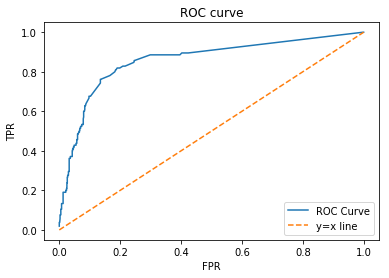

In [113]:
fpr, tpr, _ = roc_curve(y_test, bagDT1.predict_proba(X_test)[:,1])
plt.clf()
ROC_Curve, = plt.plot(fpr, tpr)
x = np.linspace(0, 1, 100)
equal_line, = plt.plot(x,x,linestyle='dashed')
plt.legend( [ROC_Curve,equal_line],["ROC Curve","y=x line"])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [125]:
DT2 = DecisionTreeClassifier(max_depth=40)
bagDT2 = BaggingClassifier(base_estimator = DT2)

In [126]:
bagDT2.fit(X_train_Norm,y_train_Norm)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [127]:
print("Train Accuracy with Normalization = ",bagDT2.score(X_train_Norm,y_train_Norm))

Train Accuracy with Normalization =  0.9897676991150443


In [128]:
print("Test Accuracy with Normalization = ",bagDT2.score(X_test_Norm,y_test_Norm))

Test Accuracy with Normalization =  0.8906077348066298


In [129]:
bagDT2.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [130]:
print("Train Accuracy without Normalization = ",bagDT2.score(X_train,y_train))

Train Accuracy without Normalization =  0.9914269911504425


In [131]:
print("Test Accuracy without Normalization = ",bagDT2.score(X_test,y_test))

Test Accuracy without Normalization =  0.8950276243093923


In [132]:
y_pred_bagDT2 = bagDT2.predict(X_test)
print(confusion_matrix(y_test, y_pred_bagDT2))

[[773  27]
 [ 68  37]]


In [133]:
print(classification_report(y_test, y_pred_bagDT2))

             precision    recall  f1-score   support

        0.0       0.92      0.97      0.94       800
        1.0       0.58      0.35      0.44       105

avg / total       0.88      0.90      0.88       905



In [134]:
print(roc_auc_score(y_test, bagDT2.predict_proba(X_test)[:,1]))

0.8766369047619048


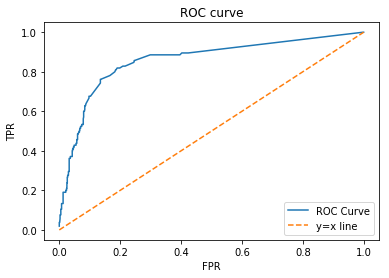

In [135]:
fpr, tpr, _ = roc_curve(y_test, bagDT1.predict_proba(X_test)[:,1])
plt.clf()
ROC_Curve, = plt.plot(fpr, tpr)
x = np.linspace(0, 1, 100)
equal_line, = plt.plot(x,x,linestyle='dashed')
plt.legend( [ROC_Curve,equal_line],["ROC Curve","y=x line"])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()